In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, recall_score, precision_score, f1_score,log_loss ,matthews_corrcoef, confusion_matrix, accuracy_score, log_loss, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer,LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import IPython.display as ipd
import warnings
%matplotlib inline

In [2]:
path = "/kaggle/input/nisha-ahuja-sdn/dataset_sdn.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [6]:
label_encoder = LabelEncoder()
label_encoder.fit(df['Protocol'])
df['Protocol'] = label_encoder.transform(df['Protocol'])

In [7]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,2,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,3,3413,3665,0,0.0,0.0,0


In [8]:
df['label'].value_counts()

label
0    63561
1    40784
Name: count, dtype: int64

In [9]:
df.shape

(104345, 23)

In [10]:
df.keys()

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [11]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,...,104345.000000,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,...,212.210676,0.600987,0.925890,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,...,246.855123,0.489698,0.844045,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,...,-4365.000000,0.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,...,0.000000,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,...,276.000000,1.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,...,333.000000,1.000000,2.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,...,639.000000,1.000000,2.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [12]:
[features for features in df.columns if df[features].isnull().sum()>0]

['rx_kbps', 'tot_kbps']

In [13]:
df.dropna(inplace = True)

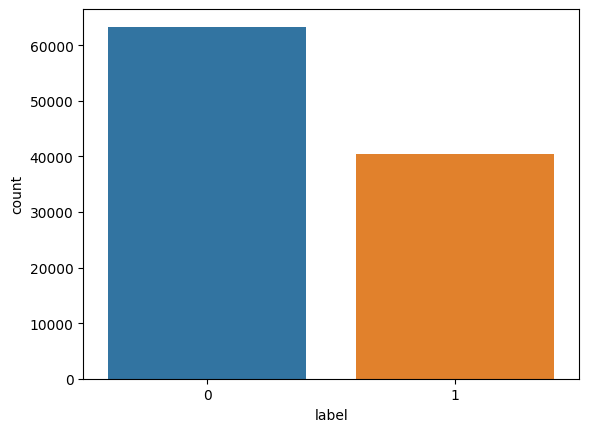

In [14]:
sns.countplot(x='label', data=df)
plt.show()

## **Ensemble Machine Learning algorithm**

In [15]:
predictorNames = ['dt', 'switch', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']

In [16]:
predictors = df[predictorNames]

In [17]:
response = df['label']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)

# **Boasting (Adaboast Classifier) {1}** #

In [19]:
template = DecisionTreeClassifier(max_depth=5)

In [20]:
classificationEnsemble = AdaBoostClassifier(estimator=template,
                                             n_estimators=100,
                                             learning_rate=0.1)

In [21]:
classificationEnsemble.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, n_estimators=100)

In [22]:
y_pred1 = classificationEnsemble.predict(X_test)

In [23]:
Accuracy1 = accuracy_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
f11 = f1_score(y_test, y_pred1)
mcc1 = matthews_corrcoef(y_test, y_pred1)

In [24]:
print("Nisha Ahuja Dataset Boasting")
print('Accuracy:', Accuracy1*100)
print('Recall:', recall1*100)
print('Precision:', precision1*100)
print('F1 Score:', f11*100)
print('MCC Score:', mcc1*100)

Nisha Ahuja Dataset Boasting
Accuracy: 99.98555469953774
Recall: 99.9877375843041
Precision: 99.97547817557626
F1 Score: 99.98160750413831
MCC Score: 99.96971505028814


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


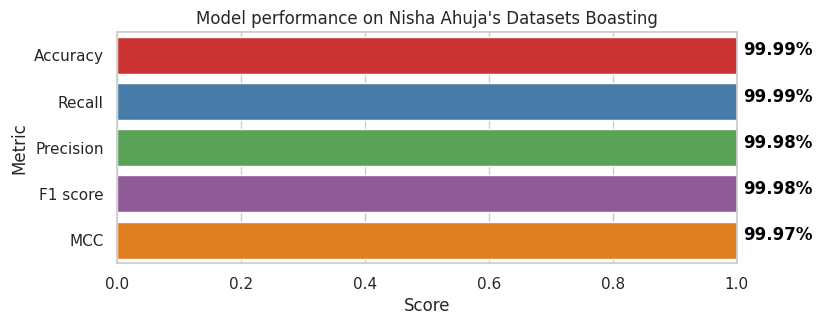

In [25]:
labels = ['Accuracy', 'Recall', 'Precision', 'F1 score', 'MCC']
scores = [Accuracy1, recall1, precision1, f11,mcc1]  

sns.set(style='whitegrid')
sns.set_color_codes('pastel')
palette = sns.color_palette('Set1')

fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=scores, y=labels, palette=palette)

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, f'{v * 100:.2f}%', color='black', fontweight='bold')

ax.set_xlim(0, 1)
ax.set_xlabel('Score')
ax.set_ylabel('Metric')
ax.set_title("Model performance on Nisha Ahuja's Datasets Boasting")

plt.show()

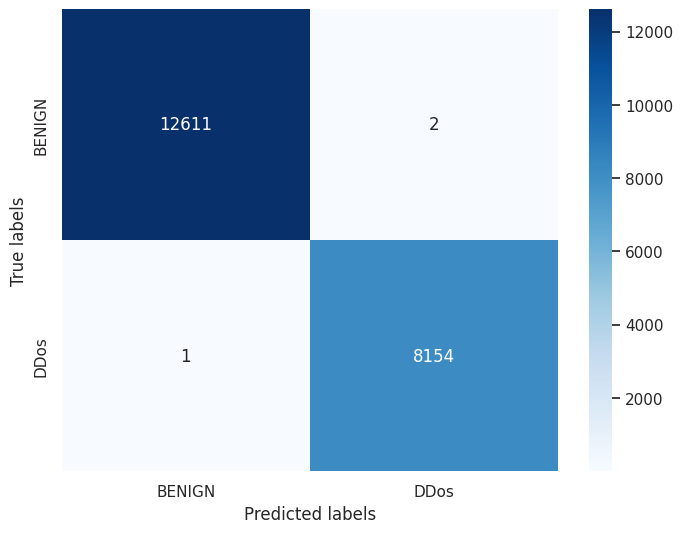

In [26]:
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['BENIGN', 'DDos'], yticklabels=['BENIGN', 'DDos'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# **Bagging** #

In [27]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5)

In [28]:
bagging = BaggingClassifier(estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)

In [29]:
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=5),
                  max_features=0.8, max_samples=0.8, n_estimators=100)

In [30]:
y_pred2 = bagging.predict(X_test)

In [31]:
Accuracy2 = accuracy_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2)
mcc2 = matthews_corrcoef(y_test, y_pred2)

In [32]:
print("Nisha Ahuja Dataset Bagging")
print('Accuracy:', Accuracy2*100)
print('Recall:', recall2*100)
print('Precision:', precision2*100)
print('F1 Score:', f12*100)
print('MCC Score:', mcc2*100)

Nisha Ahuja Dataset Bagging
Accuracy: 97.53948382126349
Recall: 99.77927651747395
Precision: 94.28736964078794
F1 Score: 96.95561513255882
MCC Score: 95.00089803967134


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


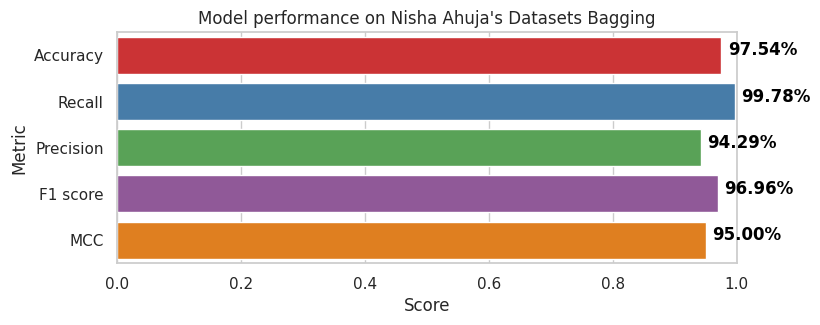

In [33]:
labels = ['Accuracy', 'Recall', 'Precision', 'F1 score', 'MCC']
scores = [Accuracy2, recall2, precision2, f12,mcc2]  

sns.set(style='whitegrid')
sns.set_color_codes('pastel')
palette = sns.color_palette('Set1')

fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=scores, y=labels, palette=palette)

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, f'{v * 100:.2f}%', color='black', fontweight='bold')

ax.set_xlim(0, 1)
ax.set_xlabel('Score')
ax.set_ylabel('Metric')
ax.set_title("Model performance on Nisha Ahuja's Datasets Bagging")

plt.show()


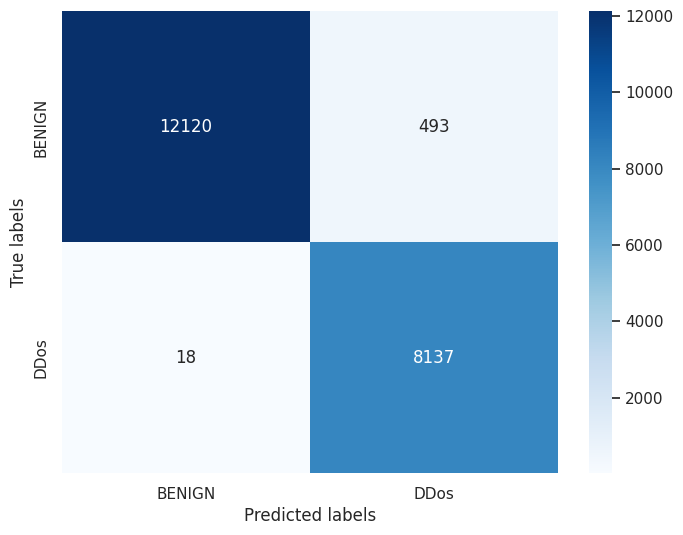

In [34]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['BENIGN', 'DDos'], yticklabels=['BENIGN', 'DDos'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()